---

# 과제2 (2) 타이타닉 자료 EDA & 잔처리

## 0: 도메인 살펴보기 : Titanic-Dataset

1. 개요

- 대상자 정보: 생존, 성별, 나이, 승객 요금, 탑승지 등


2. 데이터 변수 설명

- Survived : 0=사망, 1=생존
- Pclass: 좌석 등급
- SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
- Parch: 함께 탑승한 부모, 자녀의 수
- Fare : 요금
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

## 1. 가설 세우기

- 좌석 등급이 높은 사람일수록 생존 확률이 높을 것이다
- 나이가 20세 이하인 사람일수록 생존 확률이 높을 것이다
- 여성이 남성보다 생존 확률이 높을 것이다

## 2. 라이브러리 로드

In [1]:
#필요한 라이브러리 불러오기
#pandas: 데이터 분석을 위한 라이브러리
#numpy: 데이터 연산을 위한 라이브러리
#seaborn: 데이터 시각화를 위한 라이브러리


import pandas as pd 
import numpy as np
import seaborn as sns

데이터 시각화를 위한 폰트 설정
- matplotlib: 데이터 시각화 라이브러리
- matplotlib inline: 그래프가 노트북 안에 보이게 하기 위해
- plt.rc('font', family='Malgun Gothic'): 한글깨짐 방지
- plt.rc('axes', unicode_minus=False): 마이너스 기호 깨짐 방지
- 폰트가 선명하게 보이도록 설정

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\강태희\AppData\Local\Temp\ipykernel_24496\1557408062.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 3. 데이터 불러오기

In [3]:
df= pd.read_csv("C:/Users/강태희/Documents/data/Titanic-Dataset.csv")

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#열 확인

print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
#데이터 크기 확인

df.shape

(891, 12)

## 4. EDA

### 4-1. 데이터 살펴보기

In [6]:
#데이터 상위 5개만 미리보기

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#데이터 하위 5개 미리보기

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
#데이터 정보 요약 (결측치, 데이터 타입)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#기술통계량 확인

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4-2. 결측치 확인하기

In [14]:
df.isna().sum(axis=0).sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [16]:
null_count = df.isnull().sum()
null_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

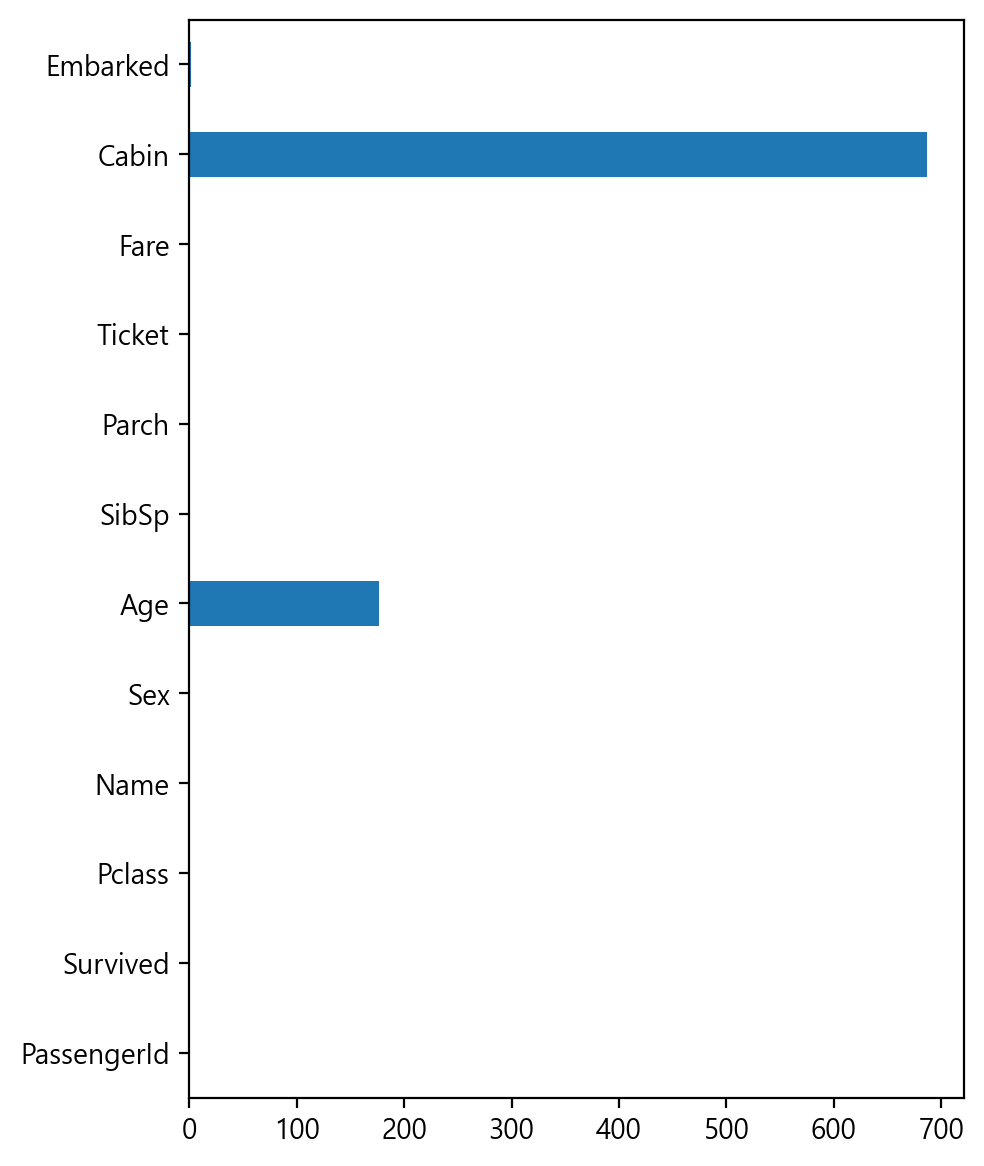

In [18]:
#행별로 나타나는 결측값의 수를 bar plot으로 나타냄
#plot.barh(): 범주가 있는 데이터 값을 수평 막대로 표현
#plot.()에서 적합한 그래프 사용할 것
#rot= : 글자를 원하는 각도로 회전시킴
#figsize: 그래프 사이즈 조정


null_count.plot.barh(figsize=(5,7))

Cabin의 절반 이상이 결측값인걸 확인할 수 있음

In [20]:
#중복행 확인

df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 4-3. 변수별로 특징을 살펴보기

- 좌석 등급의 비율 확인

In [25]:
df_c=df.copy()
df_c

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
pclass=df['Pclass'].value_counts()
pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [29]:
#좌석 등급 별 비율 확인

pclass_normalize=df['Pclass'].value_counts(normalize=True)
pclass_normalize

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

<Axes: xlabel='Pclass', ylabel='Survived'>

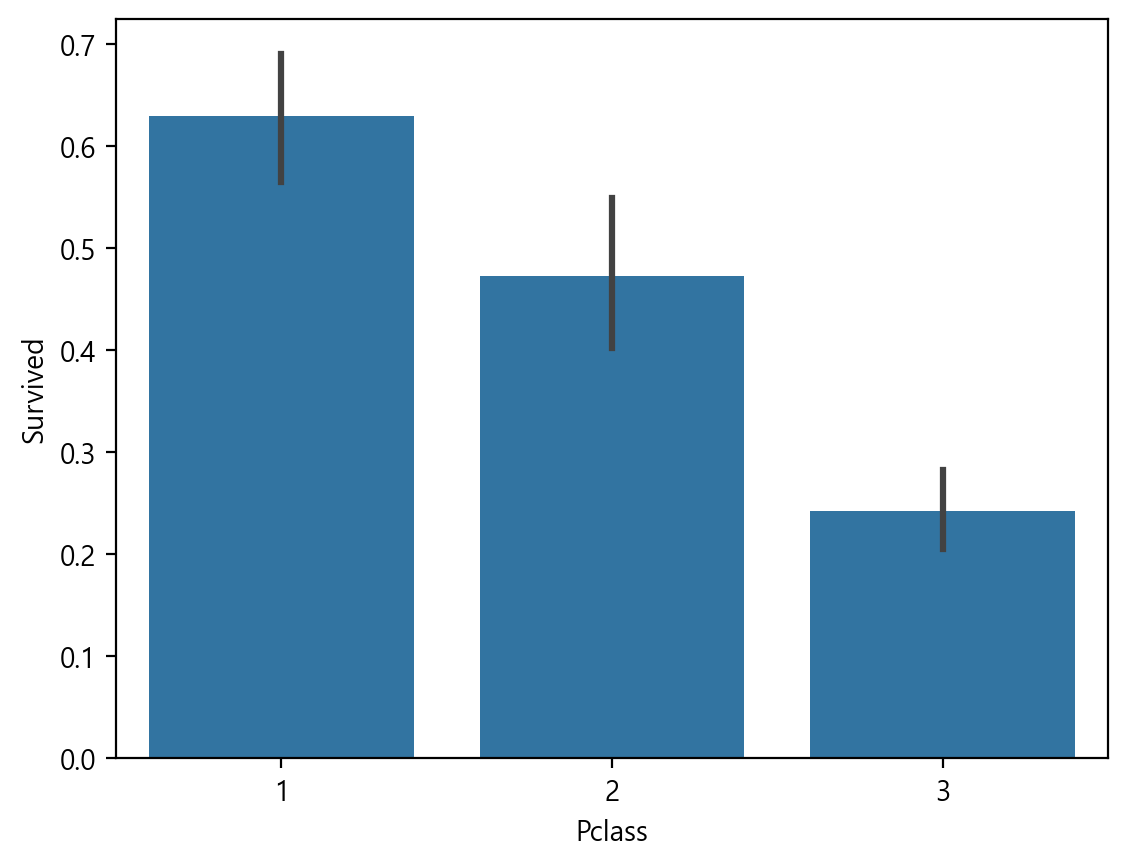

In [30]:
#좌석 등급 별 생존 비율을 bar plot으로 나타내기

sns.barplot(x='Pclass', y='Survived', data=df_c)

Text(0.5, 1.0, '좌석 등급별 생존율 차이 (성별 구분)')

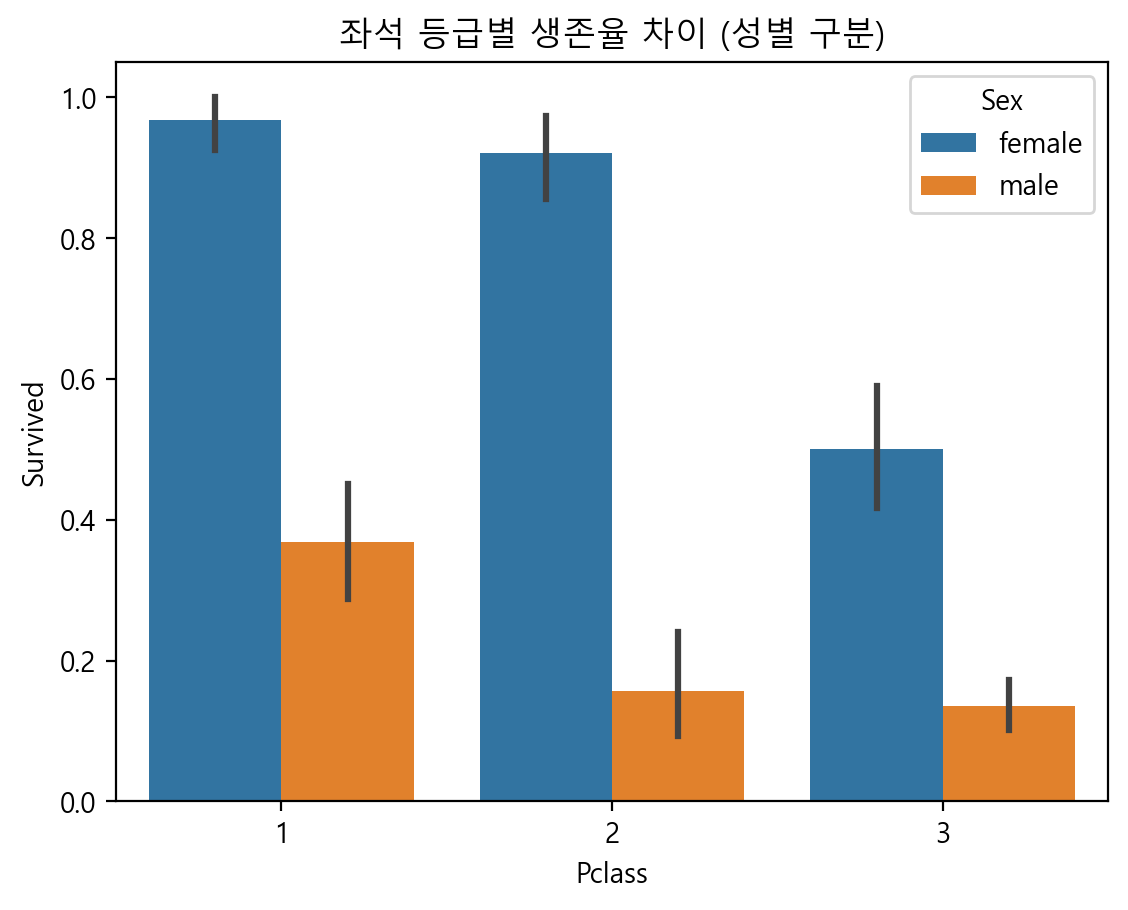

In [33]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_c)
plt.title('좌석 등급별 생존율 차이 (성별 구분)')

- 여성이 남성보다 생존했을 확률이 높음을 나타냄
- 좌석 등급이 높을수록 생존했을 확률이 높음을 나타냄

In [35]:
df_age=df['Age'].value_counts()
df_age

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='Age'>

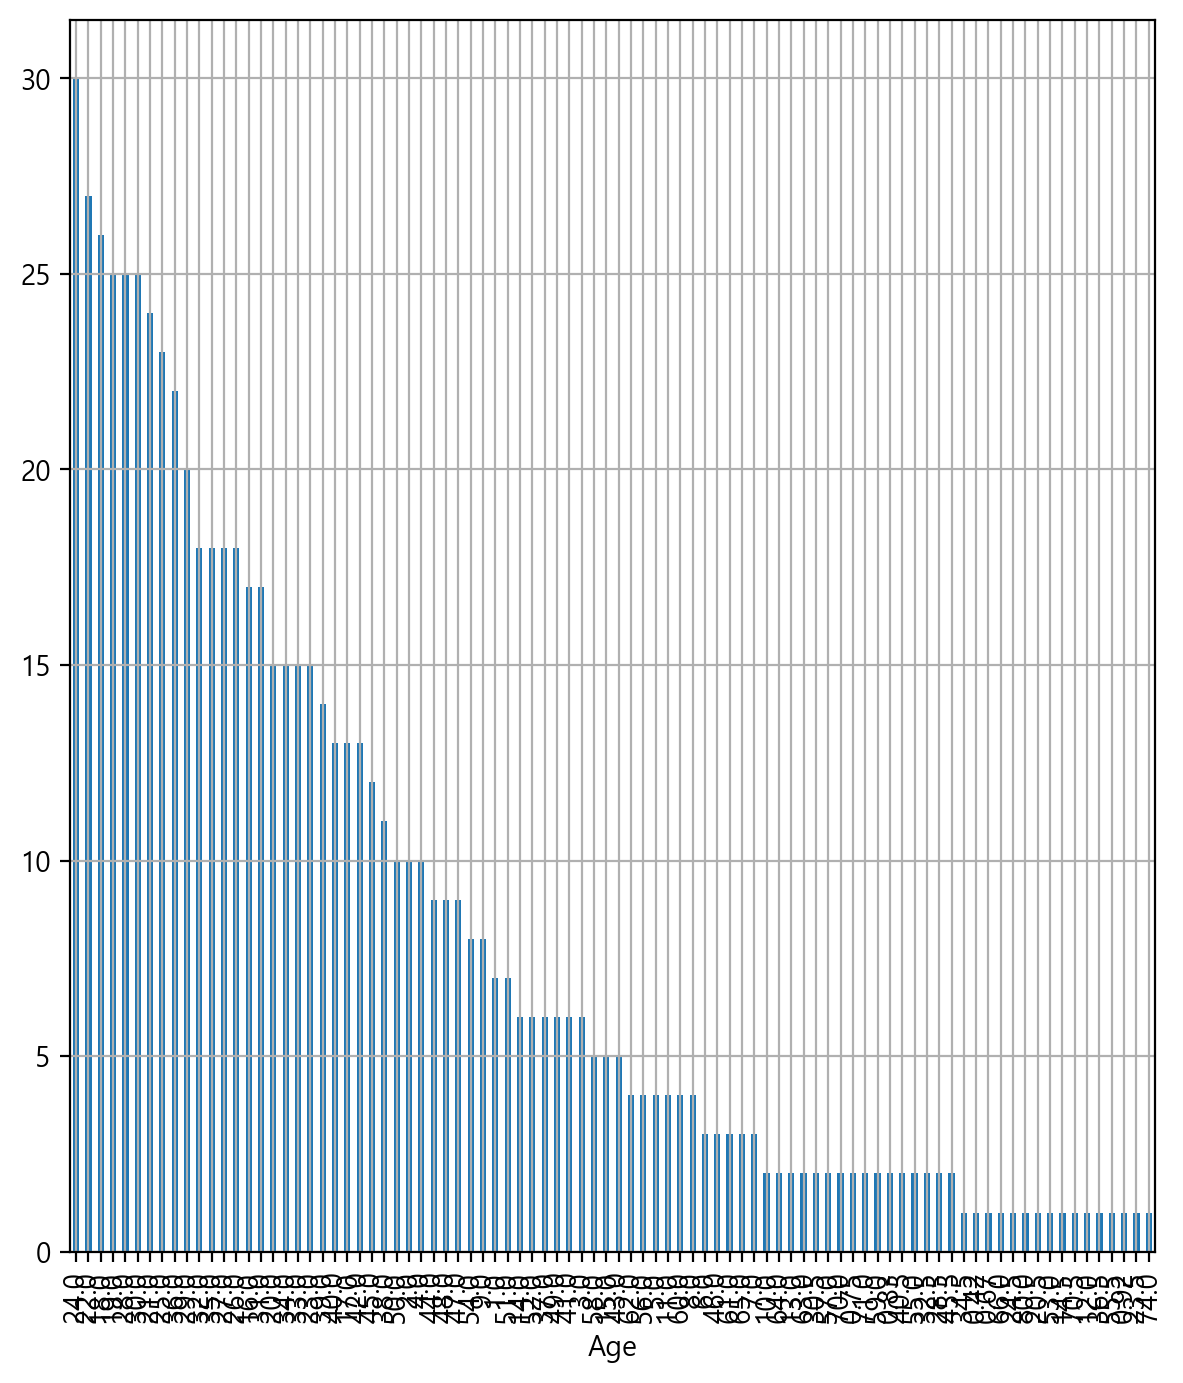

In [36]:
df_age.plot.bar(figsize=(7,8), grid=True)

Age 변수에서 결측값 제외시킨 후 나이별 생존율 분석해보기